In [125]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

In [126]:
from google.colab import files
x = files.upload()

Saving dataset.csv to dataset.csv


In [127]:
file_path = list(x.keys())[0]
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Head:")
print(df.head())

Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0        NaN  -1.382643   6.476885  15.230299  -2.341534  -2.341370   
1  -6.017066  18.522782  -0.134972 -10.577109   8.225449 -12.208436   
2 -47.917424  -1.856590 -11.063350 -11.962066   8.125258  13.562400   
3   0.970775   9.686450  -7.020531  -3.276621  -3.921082 -14.635149   
4        NaN  -9.093875        NaN -14.018511   5.868571  21.904556   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0  15.792128   7.674347  -4.694744    5.425600  ...   14.656488   -2.257763   
1   2.088636 -19.596701 -13.281860    1.968612  ...         NaN   -3.850823   
2  -0.720101        NaN   3.616360   -6.451198  ...   -2.196719         NaN   
3   2.961203   2.610553   0.051135   -2.345871  ...  -19.187712   -0.265139   
4  -9.905363  -5.662977   0.996514   -5.034757  ...    2.274599   13.071428   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0    0.

In [128]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   943 non-null    float64
 1   Feature_2   938 non-null    float64
 2   Feature_3   945 non-null    float64
 3   Feature_4   956 non-null    float64
 4   Feature_5   949 non-null    float64
 5   Feature_6   943 non-null    float64
 6   Feature_7   947 non-null    float64
 7   Feature_8   951 non-null    float64
 8   Feature_9   951 non-null    float64
 9   Feature_10  948 non-null    float64
 10  Feature_11  938 non-null    float64
 11  Feature_12  956 non-null    float64
 12  Feature_13  963 non-null    float64
 13  Feature_14  964 non-null    float64
 14  Feature_15  966 non-null    float64
 15  Feature_16  946 non-null    float64
 16  Feature_17  948 non-null    float64
 17  Feature_18  948 non-null    float64
 18  Feature_19  958 non-null    float64
 19  Feature_20  9

In [129]:
# 1. Preprocessing:
# 1) Handle missing values and Outliers:
# Handle missing values:
print("Dataset Head before handling missing values:\n", df.isnull().sum())
df.loc[0:10, 'Feature_1'] = np.nan
df.fillna(df.mean(), inplace=True)
print("Dataset Head after handling missing values:\n", df.isnull().sum())

Dataset Head before handling missing values:
 Feature_1     107
Feature_2     112
Feature_3     105
Feature_4      94
Feature_5     101
Feature_6     107
Feature_7     103
Feature_8      99
Feature_9      99
Feature_10    102
Feature_11    112
Feature_12     94
Feature_13     87
Feature_14     86
Feature_15     84
Feature_16    104
Feature_17    102
Feature_18    102
Feature_19     92
Feature_20     89
Feature_21     93
Feature_22    114
Feature_23    102
Feature_24    107
Feature_25     92
Feature_26    100
Feature_27     92
Feature_28     99
Feature_29    110
Feature_30     97
dtype: int64
Dataset Head after handling missing values:
 Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feat

In [130]:
# Handling Outliers:
# Detect outliers using iqr
for col in df.columns[:-1]:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)
print("Dataset Head after handling outliers:")
print(df.head())

Dataset Head after handling outliers:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.728866  -1.382643   6.476885  15.230299  -2.341534  -2.341370   
1   0.728866  18.522782  -0.134972 -10.577109   8.225449 -12.208436   
2   0.728866  -1.856590 -11.063350 -11.962066   8.125258  13.562400   
3   0.728866   9.686450  -7.020531  -3.276621  -3.921082 -14.635149   
4   0.728866  -9.093875   0.068132 -14.018511   5.868571  21.904556   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0  15.792128   7.674347  -4.694744    5.425600  ...   14.656488   -2.257763   
1   2.088636 -19.596701 -13.281860    1.968612  ...    0.625765   -3.850823   
2  -0.720101  -0.386261   3.616360   -6.451198  ...   -2.196719   -0.432384   
3   2.961203   2.610553   0.051135   -2.345871  ...  -19.187712   -0.265139   
4  -9.905363  -5.662977   0.996514   -5.034757  ...    2.274599   13.071428   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_2

In [131]:
# 2) Scale features:
scaler = StandardScaler()

# Scale numerical features using Z-score:
for col in df.columns[:-1]:
    df[f"{col}_Z"] = scaler.fit_transform(df[[col]])

# Display results
print("Data after standardization (Z-score):")
print(df.head())

Data after standardization (Z-score):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.728866  -1.382643   6.476885  15.230299  -2.341534  -2.341370   
1   0.728866  18.522782  -0.134972 -10.577109   8.225449 -12.208436   
2   0.728866  -1.856590 -11.063350 -11.962066   8.125258  13.562400   
3   0.728866   9.686450  -7.020531  -3.276621  -3.921082 -14.635149   
4   0.728866  -9.093875   0.068132 -14.018511   5.868571  21.904556   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_20_Z  \
0  15.792128   7.674347  -4.694744    5.425600  ...     -1.396536   
1   2.088636 -19.596701 -13.281860    1.968612  ...     -1.739968   
2  -0.720101  -0.386261   3.616360   -6.451198  ...     -1.959821   
3   2.961203   2.610553   0.051135   -2.345871  ...      0.004961   
4  -9.905363  -5.662977   0.996514   -5.034757  ...     -1.218875   

   Feature_21_Z  Feature_22_Z  Feature_23_Z  Feature_24_Z  Feature_25_Z  \
0      1.419102     -0.195698      0.105884  

In [132]:
# 3) Perform feature selection:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer before feature selection
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Filter Method - Mutual Information (using f_regression for continuous target)
from sklearn.feature_selection import f_regression, SelectKBest
selector_filter = SelectKBest(score_func=f_regression, k=3)
X_train_filter = selector_filter.fit_transform(X_train, y_train)
print("\nSelected features by Filter Method:", selector_filter.get_support(indices=True))


Selected features by Filter Method: [17 18 48]


In [133]:
# 2. Build and Evaluate Models:
# 1) Train a Linear Regression model:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# 2) Evaluate using R² Score and RMSE:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear Regression")
print("RMSE:", rmse)
print("R2 Score:", r2)

# 3) Perform K-Fold Cross-Validation:
cv_scores = cross_val_score(linear_model, X_selected, y_train, cv=5, scoring='r2')
print(f"K-Fold Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.2f}")

Linear Regression
RMSE: 2.0742196586518577e-15
R2 Score: 1.0
K-Fold Cross-Validation R² Scores: [ 0.00598609  0.0045468  -0.03971294  0.00828793 -0.04682422]
Mean R²: -0.01


In [134]:
# 3. Enhance the Model:
# 1) Experiment with feature selection techniques and analyze their impact:
# Wrapper Method - Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()

n_features_to_select = 5
selector_rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Initialize RFE with the model
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
print("\nSelected features by RFE:", selector_rfe.get_support(indices=True))


Selected features by RFE: [26 28 36 37 40]


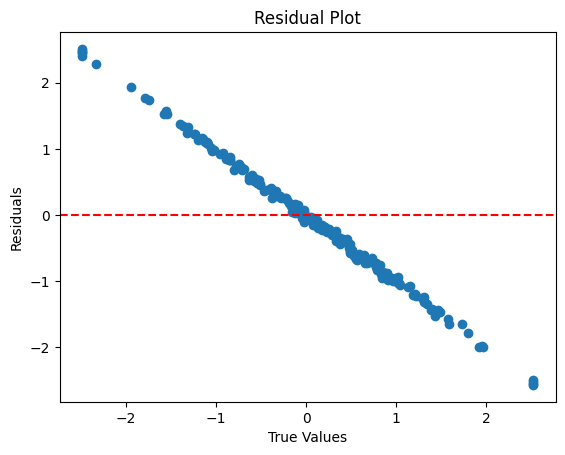

In [135]:
# 2) Visualize results:
# Residual Plot
plt.scatter(y_test, y_pred_1d - y_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [136]:
# 4. Creativity:
# 1) Advanced models:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_y_pred = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_y_pred))
print(f"Ridge Regression - R2: {ridge_r2:.2f}, RMSE: {ridge_rmse:.2f}")

Ridge Regression - R2: 1.00, RMSE: 0.00


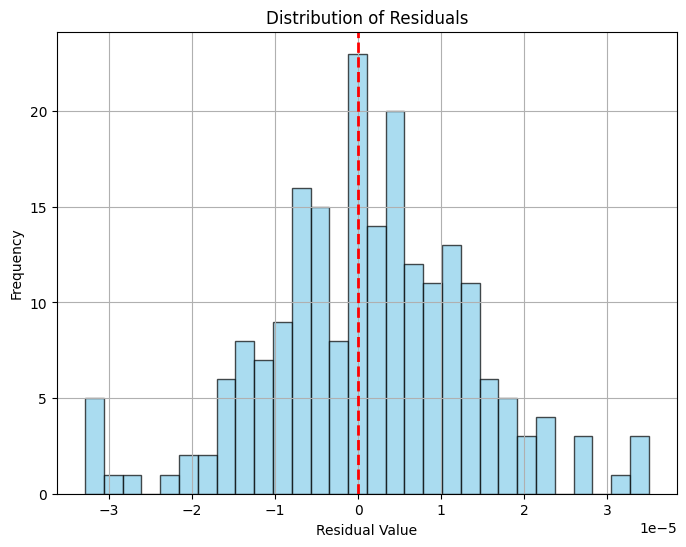

In [137]:
# 2) Insightful visualizations:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(0, color='red', lw=2, linestyle='--')
plt.title('Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

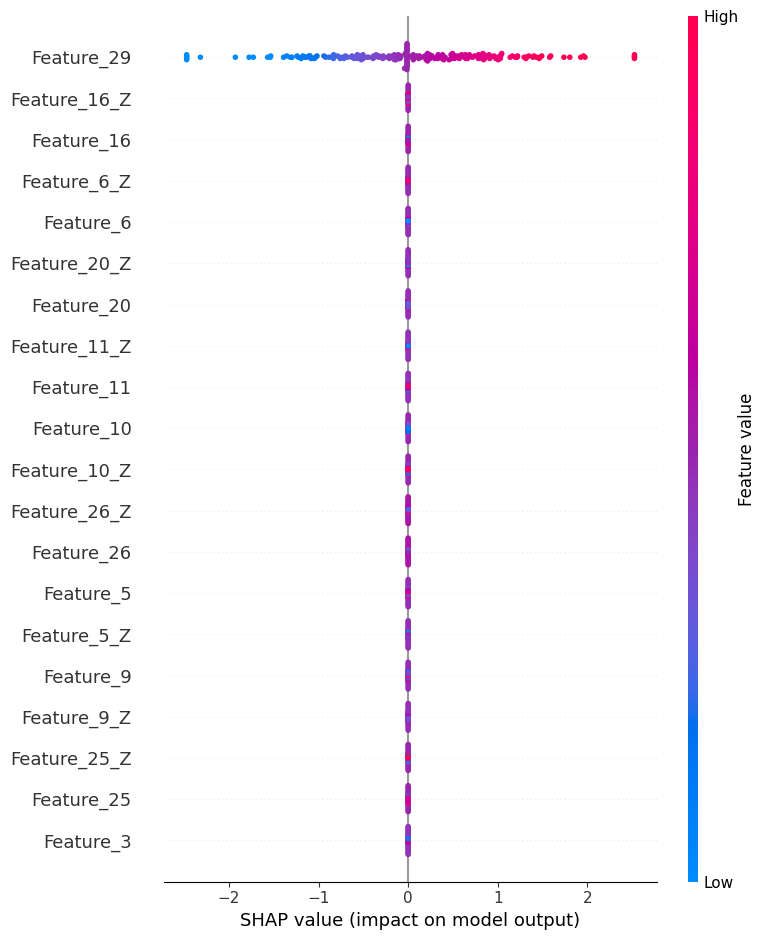

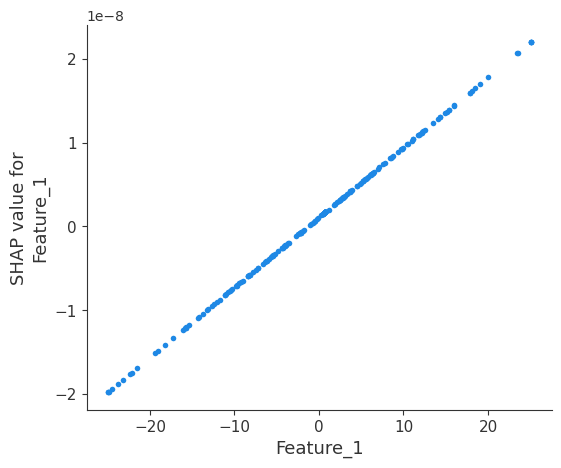

In [138]:
# 3) SHAP Analysis:
import shap
explainer = shap.Explainer(lin_reg, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test)

shap_values_array = shap_values.values

shap.dependence_plot(0, shap_values_array, X_test, interaction_index=None)
